## Namespace:
- Namespace is like a container that holds names of variables, functions, classes, and other objects in our code. It's like a folder where Python keeps track of all the different things we create in our program.

__What is mean by identifiers in python?__
- Identifiers are names used to identify various programming elements, such as variables, functions, classes, modules, and other objects. 

__What is scope?__
- A scope refers to the region in our code where a particular namespace is directly accessible.
- These below boxes are nothing but a scope.

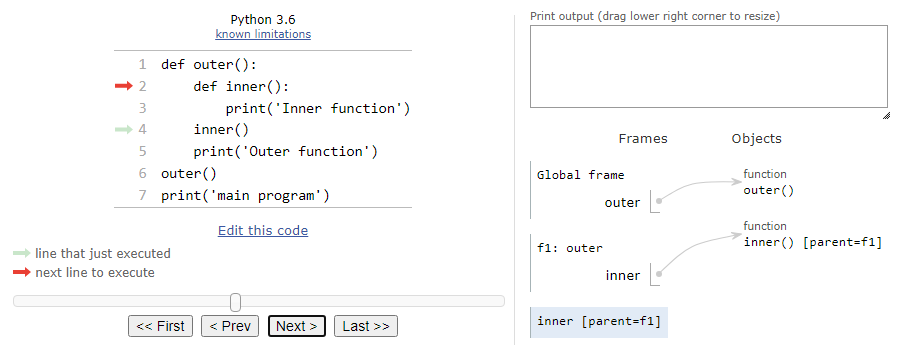

In [8]:
a = 2
b = 3
add = a + b # Here {a:2, b:3} is known as namespace

__Types of Namespaces:__
- Local namespace
- Enclosing namespace
- Global namespace
- Built-in namespace
- Module namespace
- Package namespace

__1) Local namespace:__
- It holds names that are defined inside a function or method.

__2) Enclosing nanmespace:__
- It is a kind of local namespace that exists in nested functions. If you have a function inside another function, the inner function can access names from both its local namespace and the namespace of the outer function.

In [9]:
def outer(): # Enclusive scope: function inside function
    def inner():
        print('Inner function')
    inner()
    print('Outer function')
outer()
print('Main program')

Inner function
Outer function
Main program


In [11]:
def outer(): # Enclusive
    a=3 
    def inner(): # Local
        a=4
        print(a)
    inner()
    print('Outer function')
    
a=1 # global
outer()
print('Main program')

4
Outer function
Main program


In [12]:
# Interpreter will first search in local scope then enclusive then global and then builtin

def outer(): # Enclusive
    a=3 
    def inner(): # Local
        nonlocal a # To make changes in outer function from inner function but it isnt a good programming practice
        a+=1
        print(a)
    inner()
    print('Outer function')
outer()
print('Main program')

4
Outer function
Main program


__3) Global namespace:__
- It contains names that are defined at the top level of a script or module. These names can be accessed from anywhere within the module. 

__4) Built-in namespace:__
- It contains all the names that are available by default in Python without needing to import any modules.

In [2]:
import builtins # Builtin scope

print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError

__5) Module namespace:__
- When we import a module, we're creating a module namespace.

__LEGB rule (Local, enclusive, Global, Built-in)__
- The LEGB rule in Python is a way to determine the order in which the Python interpreter searches for and finds the values of variables in different scopes.
- If in a case it doesn't find any it raises NameError.

## Decorators:
- It allows us to add something special to the functions without altering their core behavior.
- A decorator in python is a function that recieves another function as input and adds some functionality (decoration) to it and returns it.
- Decorators and higher-order functions often work together.
- A decorator is a special kind of higher-order function that takes a function as an argument and returns a new function that usually enhances or modifies the behavior of the original function.

__Types of decorators:__
- Built-in decorators like @staticmethod, @abstractmethod, @property
- User defined decorators 

In [11]:
def modify(func,num): # --> 1] # Acting as decorator
    return func(num) # --> 2] # square(3)

def square(num): # --> 3]
    return num**2 # --> 4]

modify(square, 2)

4

In [13]:
def my_decorator(func): # --> 1]
    def wrapper(): # --> 2]
        print('*'*10) # --> 3]
        func() # --> 4]
        print('*'*10) # --7]
    return wrapper

def hello(): # --> 5]
    print('Hello') --> 6]
    
a = my_decorator(hello)
a()

**********
Hello
**********


In [15]:
def my_decorator(func):
    def wrapper():
        print('*'*10)
        func()
        print('*'*10)
    return wrapper

def hello():
    print('Hello')
    
def display():
    print('Hello Omkar')
    
a=my_decorator(hello)
a()

b = my_decorator(display)
b()

**********
Hello
**********
**********
Hello Omkar
**********


In [17]:
# With using '@'

def my_decorator(func):
    def wrapper():
        print('*'*10)
        func()
        print('*'*10)
    return wrapper

@my_decorator # Decorator will automatically executed
def hello():
    print('Hellp')
    
@my_decorator
def display():
    print('Hello Omkar')
    
hello()

display()

**********
Hellp
**********
**********
Hello Omkar
**********


In [21]:
# Practical example of decorator: Creating a decorator which will print execution time of any code

import time

def timer(func):
    def wrapper():
        start = time.time()
        func()
        print(f'Time taken by function {func.__name__} is {time.time() - start} seconds') # func.__name__ isused to insert function name
    return wrapper

@timer
def hello():
    print('Hello world!')
    time.sleep(2)
    
@timer    
def display():
    print('Hello display!')
    time.sleep(3)

hello()
print('*' * 20)
display()

Hello world!
Time taken by function hello is 2.0060601234436035 seconds
********************
Hello display!
Time taken by function display is 3.0009942054748535 seconds


In [34]:
import time

def timer(func):
    def wrapper(*args): # Can take number of arguments: *args to make it generic
        start= time.time()
        func(*args)
        print(f'Time taken by function {func.__name__} is {time.time()-start} seconds')
    return wrapper

@timer
def hello():
    print('Hello world')
    time.sleep(2)
    
@timer    
def display():
    print('Hello display')
    time.sleep(3)
    
@timer
def square(num):
    time.sleep(1)
    return num**2

@timer
def area(a,b):
    time.sleep(1)
    return a*b
    
square(2)

area(2,6)

Time taken by function square is 1.0050544738769531 seconds


In [40]:
# Creating a decorator to check datatype of input is correct or not

def sanity_check(data_type):
    def outer_wrapper(func):
        def inner_wrapper(*args):
            if type(args[0]) == data_type: # You can write if type(*args) == data_type: also
                func(*args)
            else:
                raise TypeError('Datat type is not correct')
        return inner_wrapper
    return outer_wrapper
    
@sanity_check(int)
def square(num):
    print(num**2)
    
square(2)

4


## Iterators:
__What is iteration?__
- In simple words, it is the process of going through a collection of items or elements, one by one.

__What is mean by iterator?__
- Iterator is an object that allows you to look at each item one at a time, through a sequence of data without storing entire data in a memory. 
- It's like a pointer that helps you go through a collection of things, one at a time. It's like having a special tool that lets you look at each item in a box without showing you all the items at once.
- In Python, you can create an iterator using a special method called iter() on a collection (like a list). This method gives you the iterator object. Then, you use another special method called next() on the iterator object to get the next item in the collection. Each time you use next(), the iterator moves to the next item.
- The cool thing about iterators is that they are memory-efficient. They don't load all the items into memory at once; instead, they give you one item at a time, which is great for working with large collections.
- When you've reached the end of the collection and try to get the next item using next(), the iterator raises a special error called StopIteration. This tells you that you've seen all the items, and there's nothing left to iterate over.

__Advantages of iterator:__
- __`Efficient memory usage:`__ Iterators allow you to access items one by one without needing to load the entire collection into memory at once.
- __`Reduced code duplication:`__ Iterators promote cleaner and more modular code by separating the iteration logic from the actual data processing logic. 
- __`Improved performance:`__ When working with large datasets, using iterators can be more efficient than loading everything into memory at once.
- __`Chaining and composition:`__ Iterators can be chained and composed to perform complex data processing operations in a clean and modular manner.

__What is mean by iterable?__
- Iterables are like a container that holds a bunch of things. It is an object which one can iterator over.
- List, sets, tuples, dictionaries, range etc. are iterables.

__Things to remember__
- Every iterator is also iterable.
- Not all iterables are iterators.
- List is iterable but not iterator.

In [26]:
# Iterating over a list

list1 = [1,2,3,4,5]
for i in list1:
     print(i, end = ' ')

1 2 3 4 5 

In [31]:
# See the memory difference

import sys

list1 = [x for x in range(1,10000)]
list2 = range(1,10000) 

print(sys.getsizeof(list1)/64)
print(sys.getsizeof(list2)/64)

1330.875
0.75


In [32]:
list3 = [1,2,3,4]
iter(list3)
print(type(iter(list3)))

<class 'list_iterator'>


__Things to remember__
- Every iterable has an in-built iter function
- Every iterator has both iter and next buit-in function

In [34]:
str1 = 'python'
dir(str1) # Iterable has only iter function

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [6]:
dir(iter(str1)) # Iterator has both iter and next function 

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [7]:
# Understanding how for loop works

num = [1,2,3,4]
for i in num:
    print(i)

1
2
3
4


In [37]:
def fr_loop(iterable):
    iterator = iter(iterable)
    while True:
        try:
            print(next(iterator), end=' ')       
        except StopIteration:
            break
            
a = [1,2,3,4,5,6,7,8,9]
fr_loop(a)

1 2 3 4 5 6 7 8 9 

In [38]:
# When you apply iter function on an iterator object; is nothing but itself

num = [1,2,34]
iter_obj = iter(num)
iter_obj2 = iter(iter_obj)

print(id(iter_obj), 'Address of iterator 1')
print(id(iter_obj2), 'Address of iterator 2')

1917257875264 Address of iterator 1
1917257875264 Address of iterator 2


In [43]:
# Practical implpementation: Creating our own range function

class my_range:
    def __init__(self,start,end):
        self.start = start
        self.end = end
    def __iter__(self):
        return my_range_iterator(self)
    
class my_range_iterator:
    def __init__(self,iterable_obj):
        self.iterable = iterable_obj
    def __iter__(self):
        return self
    def __next__(self):
        if self.iterable.start>= self.iterable.end:
            raise StopIteration
        current = self.iterable.start
        self.iterable.start +=1
        return current

for i in my_range(1,11):
    print(i, end=' ')

1 2 3 4 5 6 7 8 9 10 

In [45]:
x = my_range(1,11)
type(x)

__main__.my_range

In [46]:
iter(x)

__Applications:__
- When we are working with deep learning where we have very large images and we want to extract a numpy array of each image and apply some operations on it then we can use iterator to work on a one image at a time.
- Keras image data generators works on the same principle.

## Generators:

__What is mean by generators?__
- It is a simple way of creating an iterators.
- Generators do not have return statement besides they have yield statement.

__What is the difference between yield and return?__
- __`return`__
  - It gives a value back to where the function was called from.
  - After the function reaches a return statement, it stops running entirely, and you can't continue from where you left off     - The next time you call the function, it starts fresh from the beginning.
- __`yield`__
  - It gives a value back but remembers where it stopped.
  - The function doesn't stop completely; it "pauses" and can be resumed later from where it was paused.
  - The next time you call the function, it continues from where it was paused.

In [61]:
# Ease of infinite streams

def all_even():
    n = 0
    while True:
        yield n
        n+=2
        
evenum_gen = all_even()
print(next(evenum_gen))
print(next(evenum_gen))
print(next(evenum_gen))
print(next(evenum_gen))

0
2
4
6


In [57]:
# chaining generators: combining two generators

def fibonacci_series(nums):
    x, y = 0,1
    for i in range(nums):
        x, y = y, x+y
        yield x
        
def square(nums):
    for num in nums:
        yield num**2
        
print(sum(square(fibonacci_series(10))))

4895


In [47]:
def gen_demo():
    yield 'First statement'
    yield 'Second statement'
    yield 'Third statement'
    
gen = gen_demo()

print(type(gen))
print(next(gen))
print(next(gen))
print(next(gen))

<class 'generator'>
First statement
Second statement
Third statement


In [48]:
print(next(gen)) # Reached limit

StopIteration: 

In [19]:
# Either we can use next function or we can use loop

for i in gen_demo():
    print(i)

First statement
Second statement
Third statement


In [23]:
def square(num):
    for i in range(1,num+1):
        yield i**2

In [25]:
gen =square(10)
print(next(gen))
print(next(gen))
print(next(gen))

for i in gen: 
    print(i)

1
4
9
16
25
36
49
64
81
100


In [50]:
# Practical implpementation: Creating our own range function

def my_range(start, end):
    for i in range(start, end):
        yield i

In [52]:
for i in my_range(15,20):
    print(i)

15
16
17
18
19


In [ ]:
# List comprehension expression 

L = [i**2 for i in range(1,101)]

In [29]:
# Generator expression 

gen = (i**2 for i in range(1,101))
for i in gen:
    print(i)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801
10000


In [54]:
# practical example:

import os
import cv2

def image_data_reader(folder_path):
    for file in os.listdir(folder_path):
        image_array = cv2.imread(os.path.join(folder_path, file))
        yield image_array
        
gen = image_data_reader(r'E:\Images')
next(gen)
next(gen)
next(gen)

array([[[201, 203, 221],
        [201, 203, 221],
        [201, 203, 221],
        ...,
        [184, 189, 214],
        [184, 188, 216],
        [184, 188, 216]],

       [[201, 203, 221],
        [201, 203, 221],
        [201, 203, 221],
        ...,
        [184, 189, 214],
        [184, 188, 216],
        [184, 188, 216]],

       [[201, 203, 221],
        [201, 203, 221],
        [201, 203, 221],
        ...,
        [184, 189, 214],
        [184, 188, 216],
        [184, 188, 216]],

       ...,

       [[  9, 143, 161],
        [  9, 143, 161],
        [ 10, 144, 162],
        ...,
        [ 46, 146, 170],
        [ 45, 147, 170],
        [ 45, 147, 170]],

       [[ 12, 141, 160],
        [ 10, 141, 160],
        [ 13, 142, 161],
        ...,
        [ 45, 145, 169],
        [ 44, 146, 169],
        [ 44, 146, 169]],

       [[ 12, 140, 159],
        [ 11, 140, 159],
        [ 13, 141, 160],
        ...,
        [ 45, 145, 169],
        [ 44, 146, 169],
        [ 44, 146, 169]]